In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [32]:
dia = pd.read_csv('diabetes.csv')
dia.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
random_state =  np.random.RandomState(42)

In [34]:
X = dia.iloc[:, 0:8].values # .values converts the DataFrame into the NumPy representation

In [35]:
print(X.shape)
print(type(X))

(768, 8)
<class 'numpy.ndarray'>


In [36]:
Y = dia.iloc[:, 8].values

In [37]:
print(Y.shape)
print(type(Y))

(768,)
<class 'numpy.ndarray'>


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [39]:
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_train, Y_train, test_size=0.6, random_state=random_state)
print(X_train_.shape, Y_train_.shape)
print(X_test_.shape, Y_test_.shape)

(245, 8) (245,)
(369, 8) (369,)


In [40]:
# check class balance in the training set
unique_elements, counts_elements = np.unique(Y_train_, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[163  82]


In [41]:
# check class distribution - test set
unique_elements, counts_elements = np.unique(Y_test_, return_counts=True)
print(unique_elements)
print(counts_elements)

[0 1]
[238 131]


In [42]:
from sklearn.feature_selection import SelectKBest, chi2

In [43]:
ch2 = SelectKBest(chi2, k=8) # perform a chi-square test to select the top 10 features 
X_train_ = ch2.fit_transform(X_train_, Y_train_)
X_test_ = ch2.transform(X_test_)

In [44]:
print(X_train_.shape)
print(X_test_.shape)

(245, 8)
(369, 8)


In [45]:
cols = ch2.get_support(indices=True)
dia.iloc[:,cols].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_ = sc.fit_transform(X_train_)
X_test_ = sc.transform(X_test_)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2, weights='uniform') # initialize a KNN classifier
knn.fit(X_train_, Y_train_) # train classifer with training set

KNeighborsClassifier(n_neighbors=2)

In [89]:
Y_train_predicted = knn.predict(X_train_) # note that we are predicting the outcome for the training set

In [90]:
print("Training Classification accuracy:", knn.score(X_train_, Y_train_))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train_, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train_, Y_train_predicted))

Training Classification accuracy: 0.8693877551020408


Training Confusion matrix: 
[[163   0]
 [ 32  50]]


Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       163
           1       1.00      0.61      0.76        82

    accuracy                           0.87       245
   macro avg       0.92      0.80      0.83       245
weighted avg       0.89      0.87      0.86       245



In [91]:
#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test_)
conf_matrix_knn = confusion_matrix(Y_test_, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test_,Y_test_))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test_, Y_test_predicted))

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.6856368563685636


Test Confusion matrix: 
[[217  21]
 [ 95  36]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       238
           1       0.63      0.27      0.38       131

    accuracy                           0.69       369
   macro avg       0.66      0.59      0.59       369
weighted avg       0.67      0.69      0.64       369



In [92]:
from sklearn.metrics import plot_confusion_matrix

[[217  21]
 [ 95  36]]


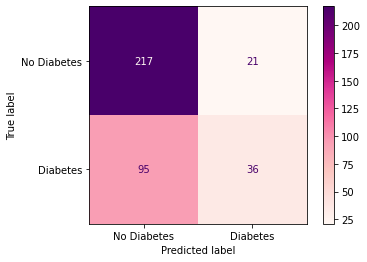

In [93]:
disp = plot_confusion_matrix(knn, X_test_, Y_test_,
                                 display_labels=['No Diabetes','Diabetes'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

In [94]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

Area under the ROC: 0.6919622810956444


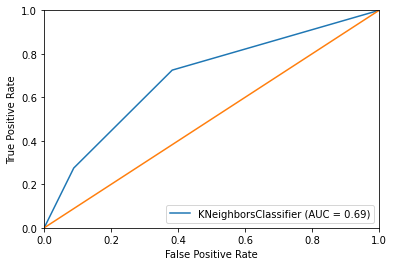

In [95]:
viz = plot_roc_curve(knn, X_test_, Y_test_)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

In [96]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train_, Y_train_)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test_)[:, 1]
       
        accuracy = knn_ht.score(X_test_,Y_test_)
        f1 = f1_score(Y_test_,knn_ht.predict(X_test_),average='weighted')
        roc = roc_auc_score(Y_test_, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.674797  0.671690  0.636362
          distance  0.674797  0.671690  0.636362
2         uniform   0.685637  0.644916  0.691962
          distance  0.674797  0.671690  0.687119
3         uniform   0.693767  0.689146  0.721470
          distance  0.682927  0.678864  0.718070
4         uniform   0.688347  0.660242  0.725287
          distance  0.693767  0.687672  0.725945
5         uniform   0.688347  0.682908  0.726137
          distance  0.677507  0.671878  0.729890

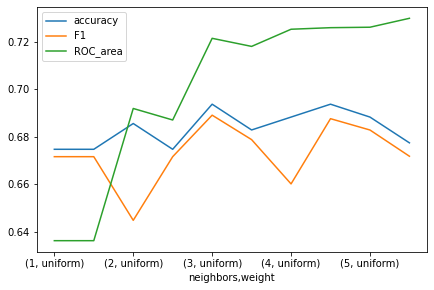

In [97]:
df_knn.plot(figsize = (7,4.5));

In [ ]:
# Looking at the graph above for the valaduation data set 3, uniform looks like the best model when it comes to accuracy
# and F1. It has a smaller ROC area compared to 4, uniform and 5, uniform but has a higher accuracy and F1. I will be 
# selecting 3, uniform.


In [ ]:
# This is testing the original training set

In [98]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])
for neighbor_count in range (1,6):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.675325  0.679495  0.662626
          distance  0.675325  0.679495  0.662626
2         uniform   0.701299  0.675765  0.698072
          distance  0.675325  0.679495  0.702847
3         uniform   0.649351  0.655805  0.700735
          distance  0.662338  0.668052  0.707989
4         uniform   0.707792  0.699248  0.710836
          distance  0.688312  0.691502  0.721947
5         uniform   0.662338  0.665794  0.720110
          distance  0.668831  0.671741  0.729568

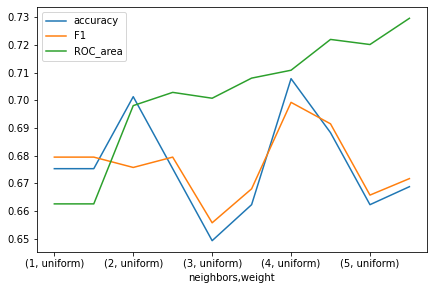

In [99]:
df_knn.plot(figsize = (7,4.5));

In [ ]:
# Compared to the validuation dataset 3, uniform could 

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') # initialize a KNN classifier
knn.fit(X_train_, Y_train_) # train classifer with training set

Y_train_predicted = knn.predict(X_train_) # note that we are predicting the outcome for the training set

print("Training Classification accuracy:", knn.score(X_train_, Y_train_))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train_, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train_, Y_train_predicted))

#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test_)
conf_matrix_knn = confusion_matrix(Y_test_, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test_,Y_test_))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test_, Y_test_predicted))


Training Classification accuracy: 1.0


Training Confusion matrix: 
[[163   0]
 [  0  82]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        82

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.6747967479674797


Test Confusion matrix: 
[[183  55]
 [ 65  66]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       238
           1       0.55      0.50      0.52       131

    accuracy                           0.67       369
   macro avg       0.64      0.64      0.64       369
weighted avg       0.67      0.67      0.67       369



In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, weights='distance') # initialize a KNN classifier
knn.fit(X_train_, Y_train_) # train classifer with training set

Y_train_predicted = knn.predict(X_train_) # note that we are predicting the outcome for the training set

print("Training Classification accuracy:", knn.score(X_train_, Y_train_))
print("\n")
print ("Training Confusion matrix: \n" + str(confusion_matrix(Y_train_, Y_train_predicted)))
print("\n")
print("Training Classification Report:\n",classification_report(Y_train_, Y_train_predicted))

#predicting the outcome for the test set
Y_test_predicted = knn.predict(X_test_)
conf_matrix_knn = confusion_matrix(Y_test_, Y_test_predicted)
print('************K-NEAREST NEIGHBOR************')
print("Test Classification accuracy:", knn.score(X_test_,Y_test_))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test_, Y_test_predicted))


Training Classification accuracy: 1.0


Training Confusion matrix: 
[[163   0]
 [  0  82]]


Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        82

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

************K-NEAREST NEIGHBOR************
Test Classification accuracy: 0.6747967479674797


Test Confusion matrix: 
[[183  55]
 [ 65  66]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       238
           1       0.55      0.50      0.52       131

    accuracy                           0.67       369
   macro avg       0.64      0.64      0.64       369
weighted avg       0.67      0.67      0.67       369

